# Task 2.1 - Dendrograms using PCA reduced datasets

## Table of Contents

#### 1. Importing Libraries and Data
#### 2. Dendrograms (for both decade and single year reduced datasets)
- Single
- Average
- Complete
- Ward

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Create a path

path = r'/Users/giadairene/Documents/CareerFoundry Data Analytics/Machine Learning with Python/ClimateWins/02 Data'

In [3]:
# Set display options to show all columns

pd.set_option('display.max_columns', None)

In [4]:
# Import reduced datasets

df_decade = pd.read_csv(os.path.join(path, 'Prepared/2010-2019_PCA.csv'), index_col = False)
df_decade

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,-12.217450,-4.593864,-8.720958,-3.157400,-6.864748,0.898670,0.468641,-7.694688,6.478885,-2.869970,-3.614554
1,-14.351214,0.560430,-6.534175,-1.175399,-7.945005,-0.725271,0.783456,-7.593860,8.741720,-3.601656,-1.765670
2,-14.612069,4.358558,-3.069482,-2.220910,-9.969848,-0.837378,2.011574,-7.567077,4.661730,-1.963600,-1.200376
3,-14.700332,3.293788,-3.300584,-3.145187,-7.202980,0.785994,3.596461,-8.157591,7.904275,0.199715,-2.489130
4,-15.651862,-0.552947,-6.012931,-2.681850,-7.627616,1.686704,0.557036,-4.807548,4.294713,-3.842520,-0.189755
...,...,...,...,...,...,...,...,...,...,...,...
3647,-8.091603,1.923631,1.504808,4.526317,1.876163,1.128997,1.040617,0.265065,0.645995,-0.383260,1.569411
3648,-8.712377,5.520537,3.940264,3.688586,1.100628,-0.010483,1.523857,0.117801,-0.108353,-1.711105,0.585610
3649,-8.121986,6.547703,5.749420,2.002482,0.657055,-1.104133,0.673908,0.007123,-0.013008,-0.954830,-0.170167
3650,-5.843433,7.843965,3.698860,-0.916471,1.928852,-0.997396,-2.835940,-0.308919,0.356794,1.134996,-0.120698


In [5]:
df_2015 = pd.read_csv(os.path.join(path, 'Prepared/2015_PCA.csv'), index_col = False)
df_2015

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,-11.439892,4.621283,2.045900,-0.460808,-2.983303,-0.255122,-2.634675,0.798546,12.119320,5.744144,3.805449
1,-9.012438,2.083631,1.505733,-0.585807,-4.505237,-0.957513,-0.805907,-0.480723,9.725530,4.565579,5.300935
2,-9.546393,-0.965579,0.550836,1.817913,-2.352192,0.659593,3.527003,0.053483,3.831541,0.985720,1.230778
3,-8.268576,4.398630,-0.802458,2.360437,-1.398000,0.753972,2.000445,0.081692,1.074776,0.214738,-1.364220
4,-9.711707,4.015296,0.656628,1.589404,-1.399819,1.740408,-0.057080,0.812609,-0.005342,-0.497240,-2.997719
...,...,...,...,...,...,...,...,...,...,...,...
360,-5.978946,1.684967,6.475303,-1.331058,0.330353,-1.223390,0.788895,0.459120,0.233881,-0.123289,-1.531144
361,-6.281865,4.178433,4.231964,-0.372358,1.917963,-2.130730,-0.298750,-0.060358,-0.884976,0.073756,0.144202
362,-7.960926,3.021123,4.266017,1.262107,1.298077,-2.163668,-0.636455,-0.641626,-1.071654,-1.321714,0.367501
363,-8.303937,2.054489,4.531086,0.030866,1.489933,-3.351810,0.003916,0.005768,-1.138275,-0.768725,-0.201925


In [6]:
# Import the answers dataset (0 = unpleasant day, 1 = pleasant day)

answers = pd.read_csv(os.path.join(path, 'Original/Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
answers

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The answers don’t include three of the weather stations (Gdansk, Rome and Tours), as there isn’t enough pertinent data to create a supervised answer set.

## 2. Dendrograms

### Decade reduced dataset

In [8]:
# Select relevant columns to plot

columns_to_plot = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11']

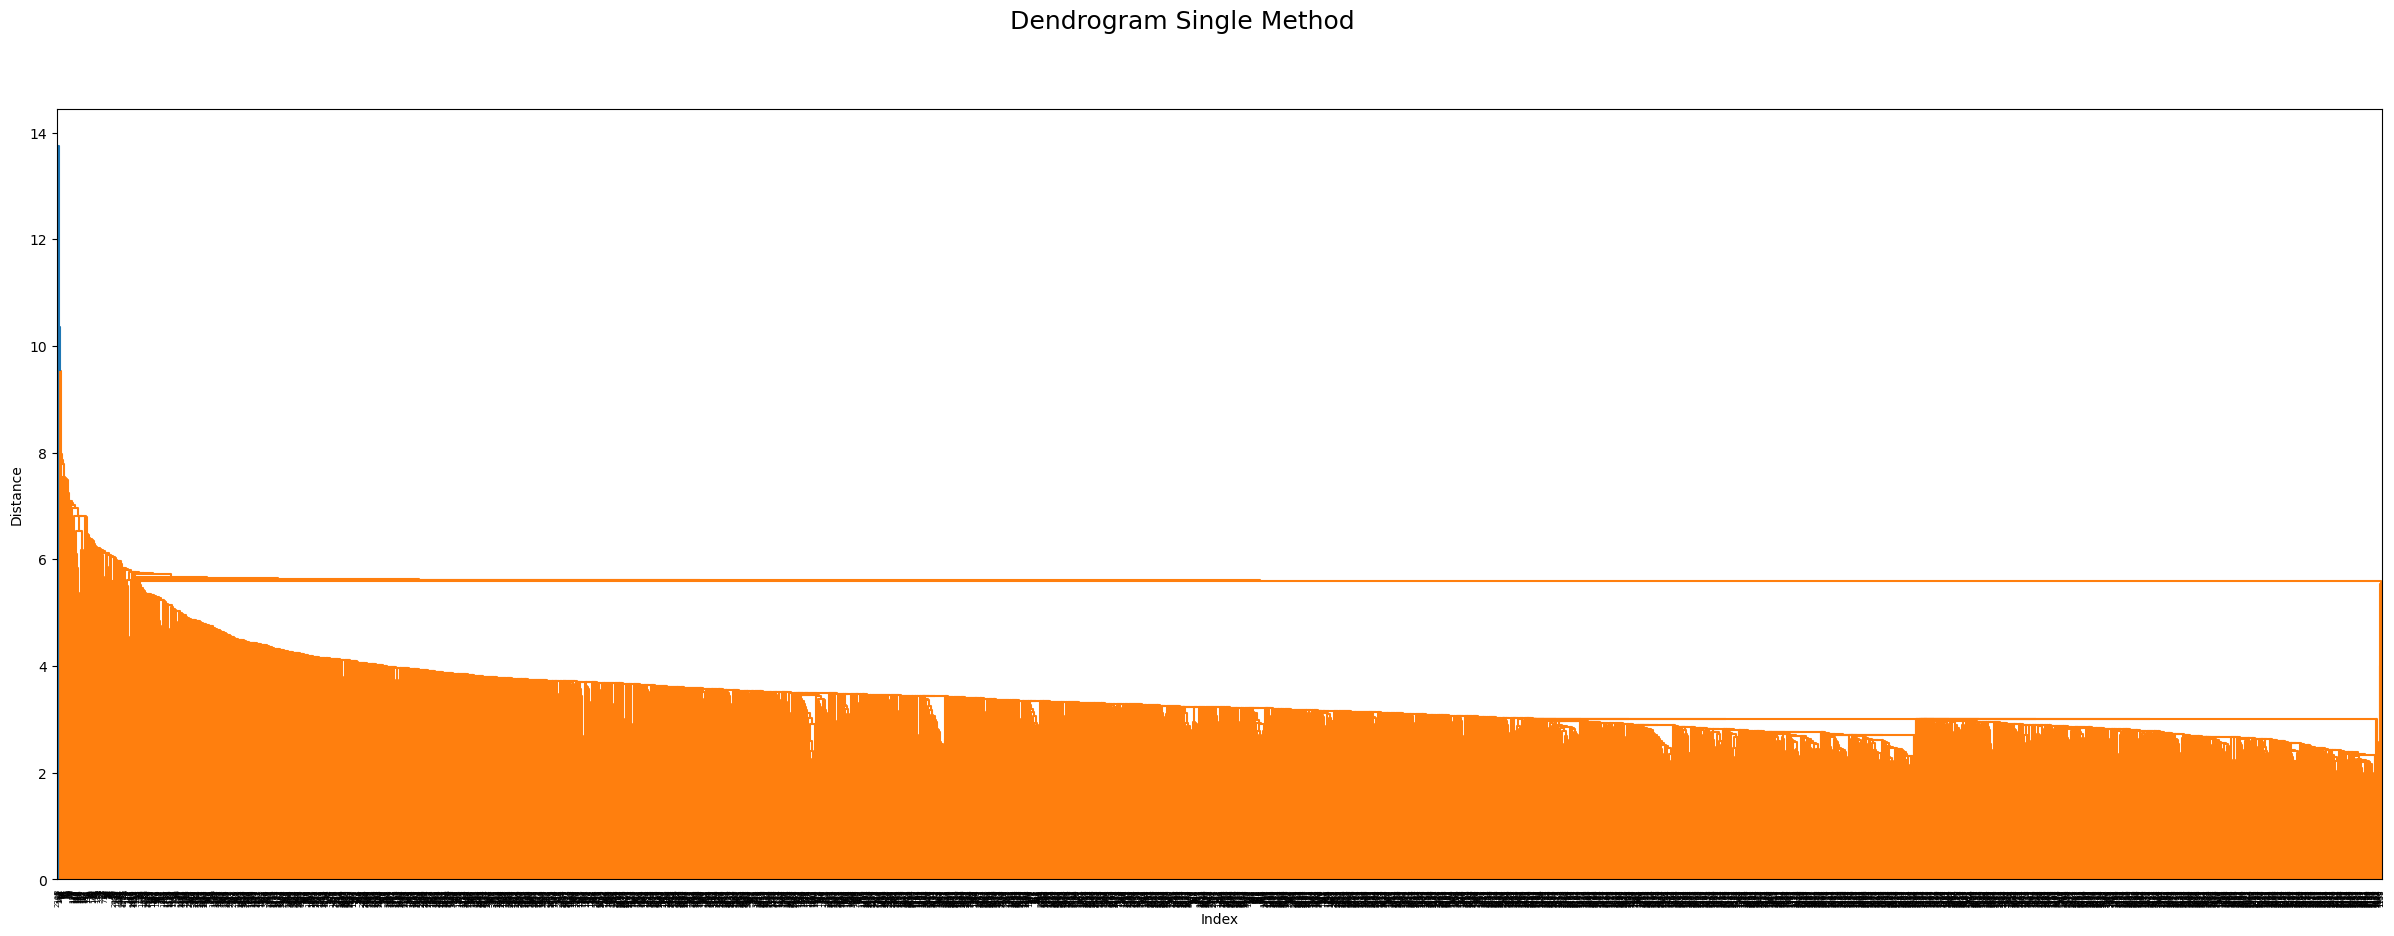

In [9]:
# Single method

distance_single = linkage(df_decade[columns_to_plot], method="single")
plt.figure(figsize=(30,10))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

It seems there is still too much data and the dendrogram is difficult to interpret.

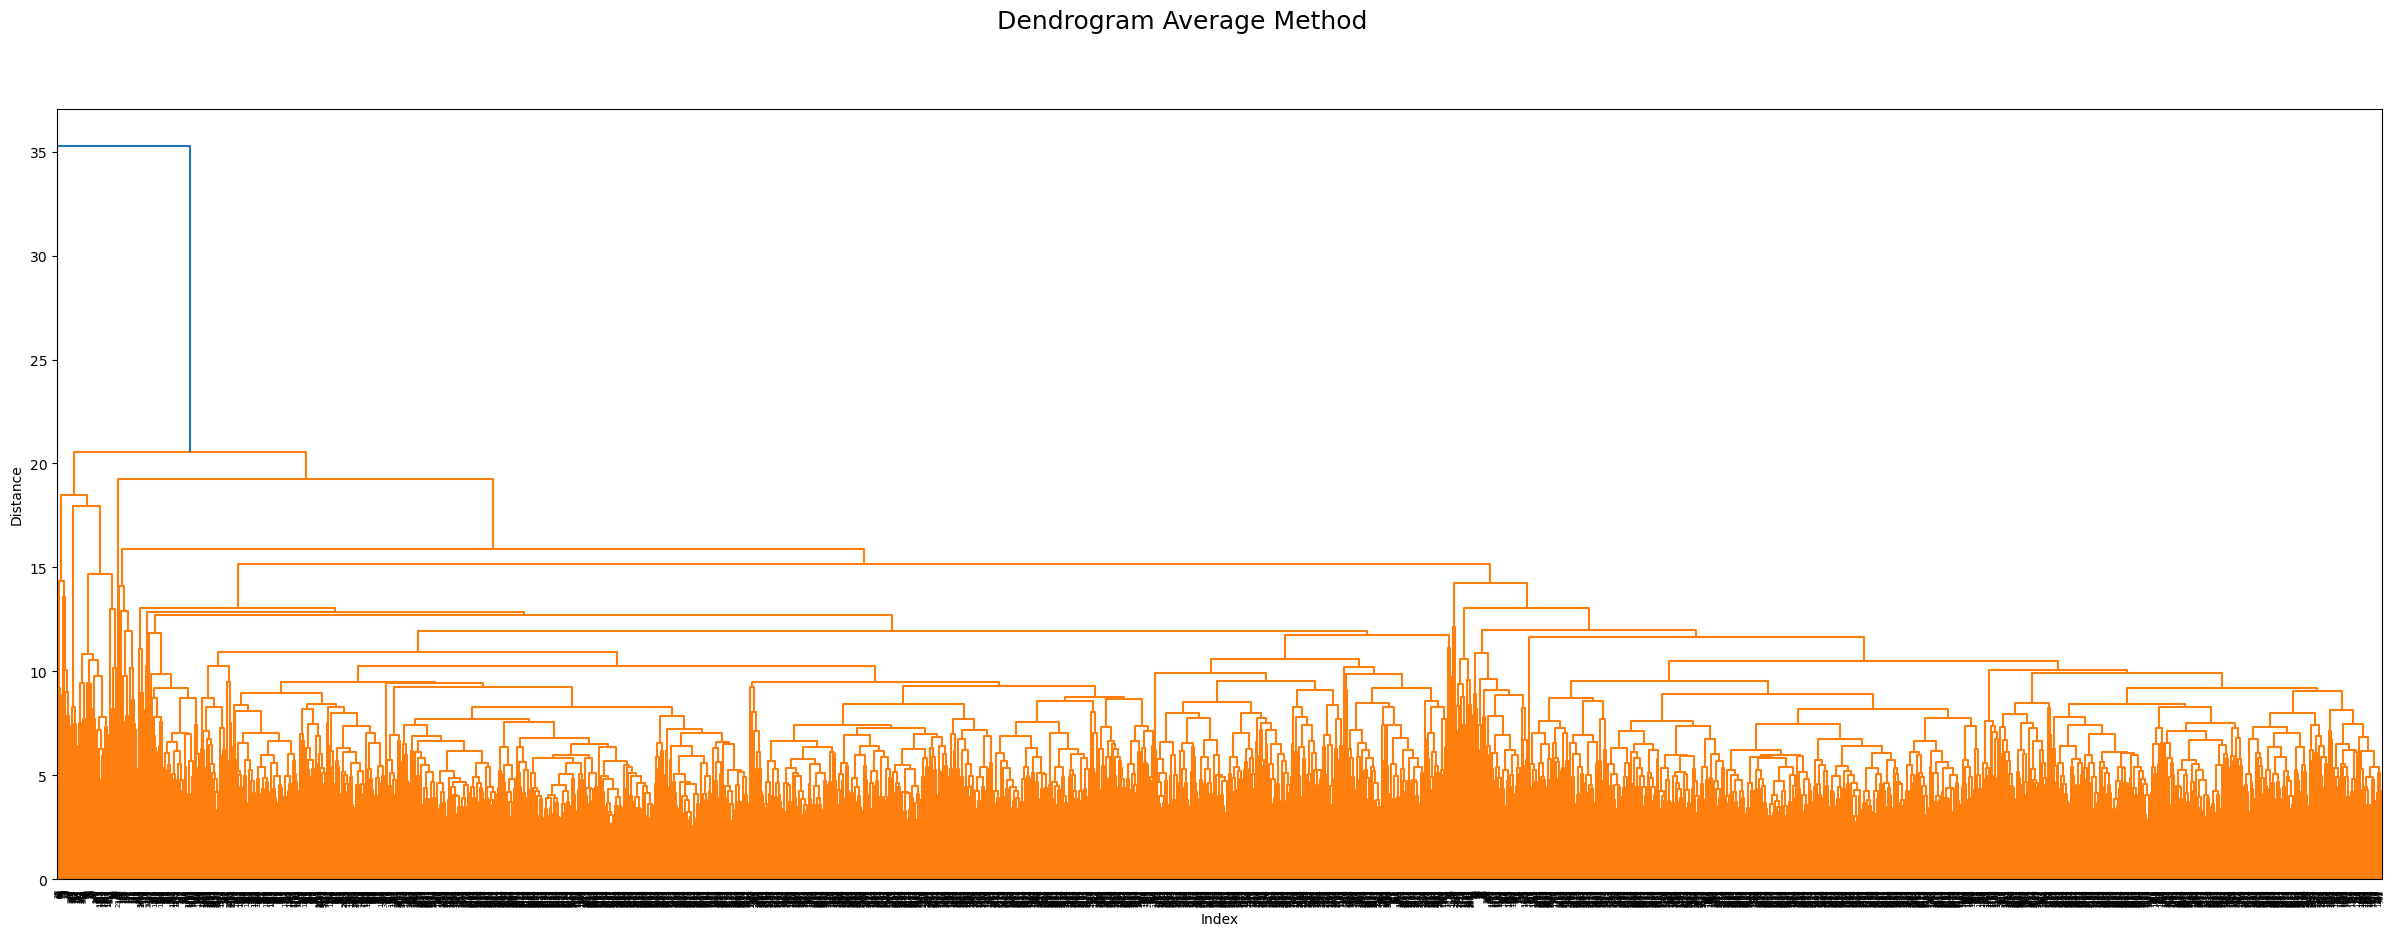

In [10]:
# Average method

distance_single = linkage(df_decade[columns_to_plot], method="average")
plt.figure(figsize=(30,10))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

Here as well there is probably too much data and the dendrogram is difficult to interpret.

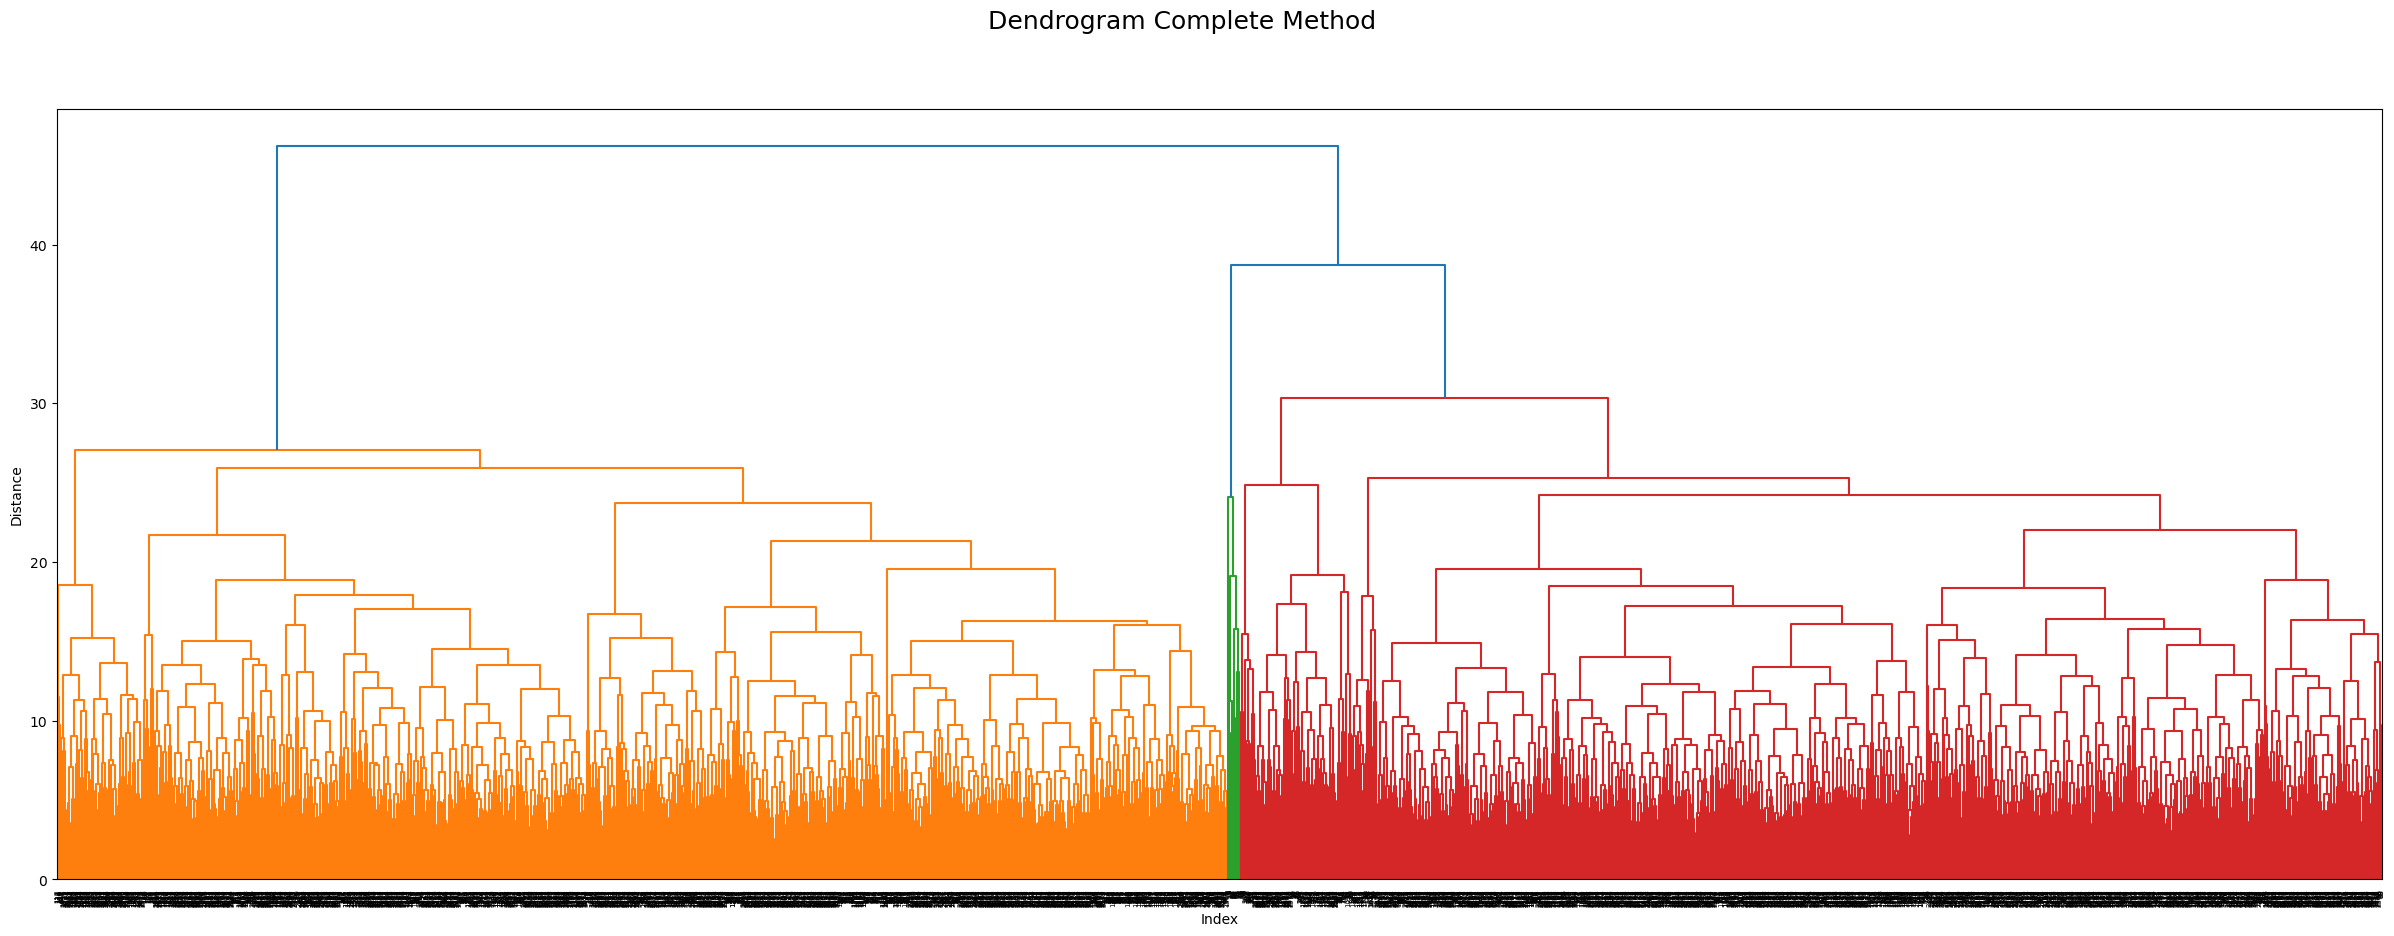

In [11]:
# Complete method

distance_single = linkage(df_decade[columns_to_plot], method="complete")
plt.figure(figsize=(30,10))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

A bit more understandable but still too noisy and chaotic.

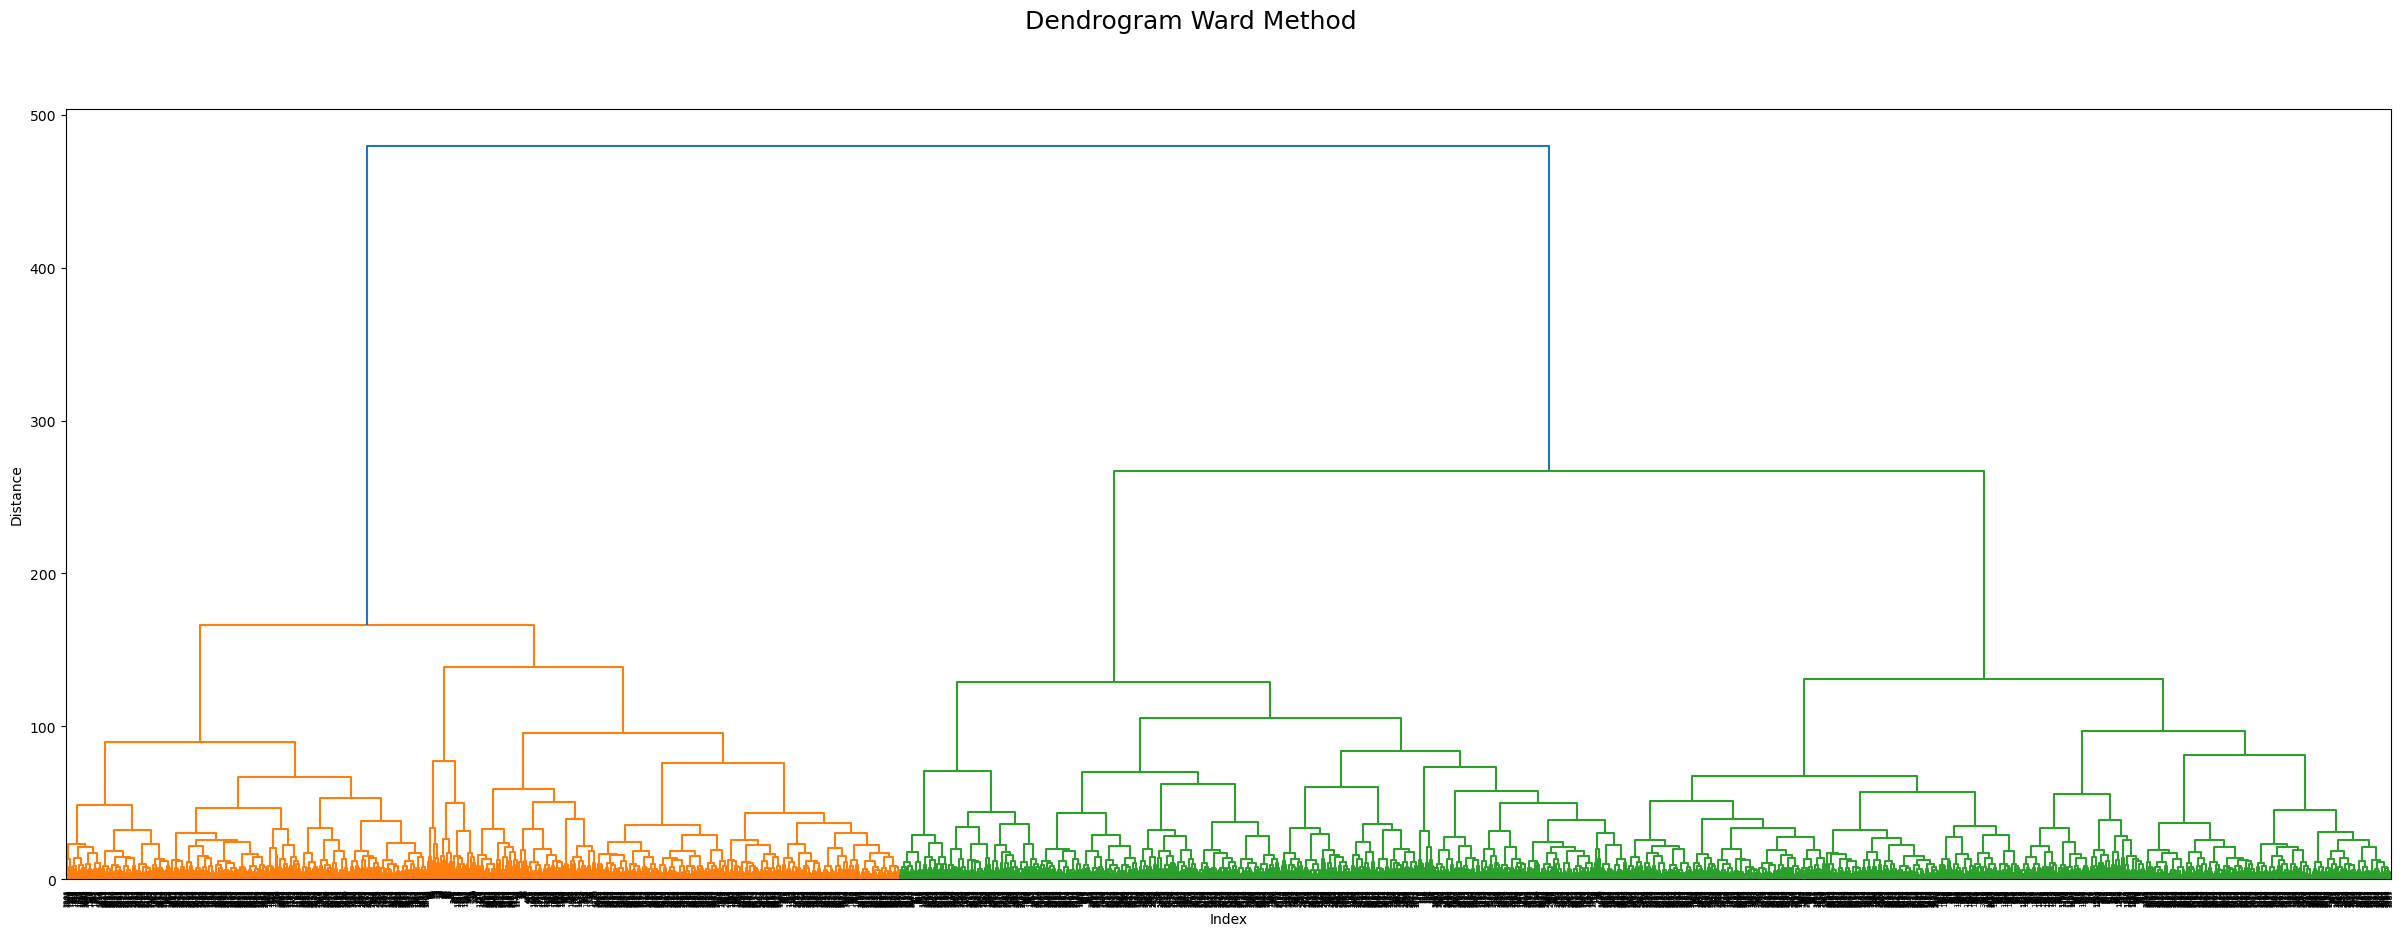

In [12]:
# Ward method

distance_single = linkage(df_decade[columns_to_plot], method="ward")
plt.figure(figsize=(30,10))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

Way more understandable, though it is difficult to say how many clusters were created.

### Year (2015) reduced dataset

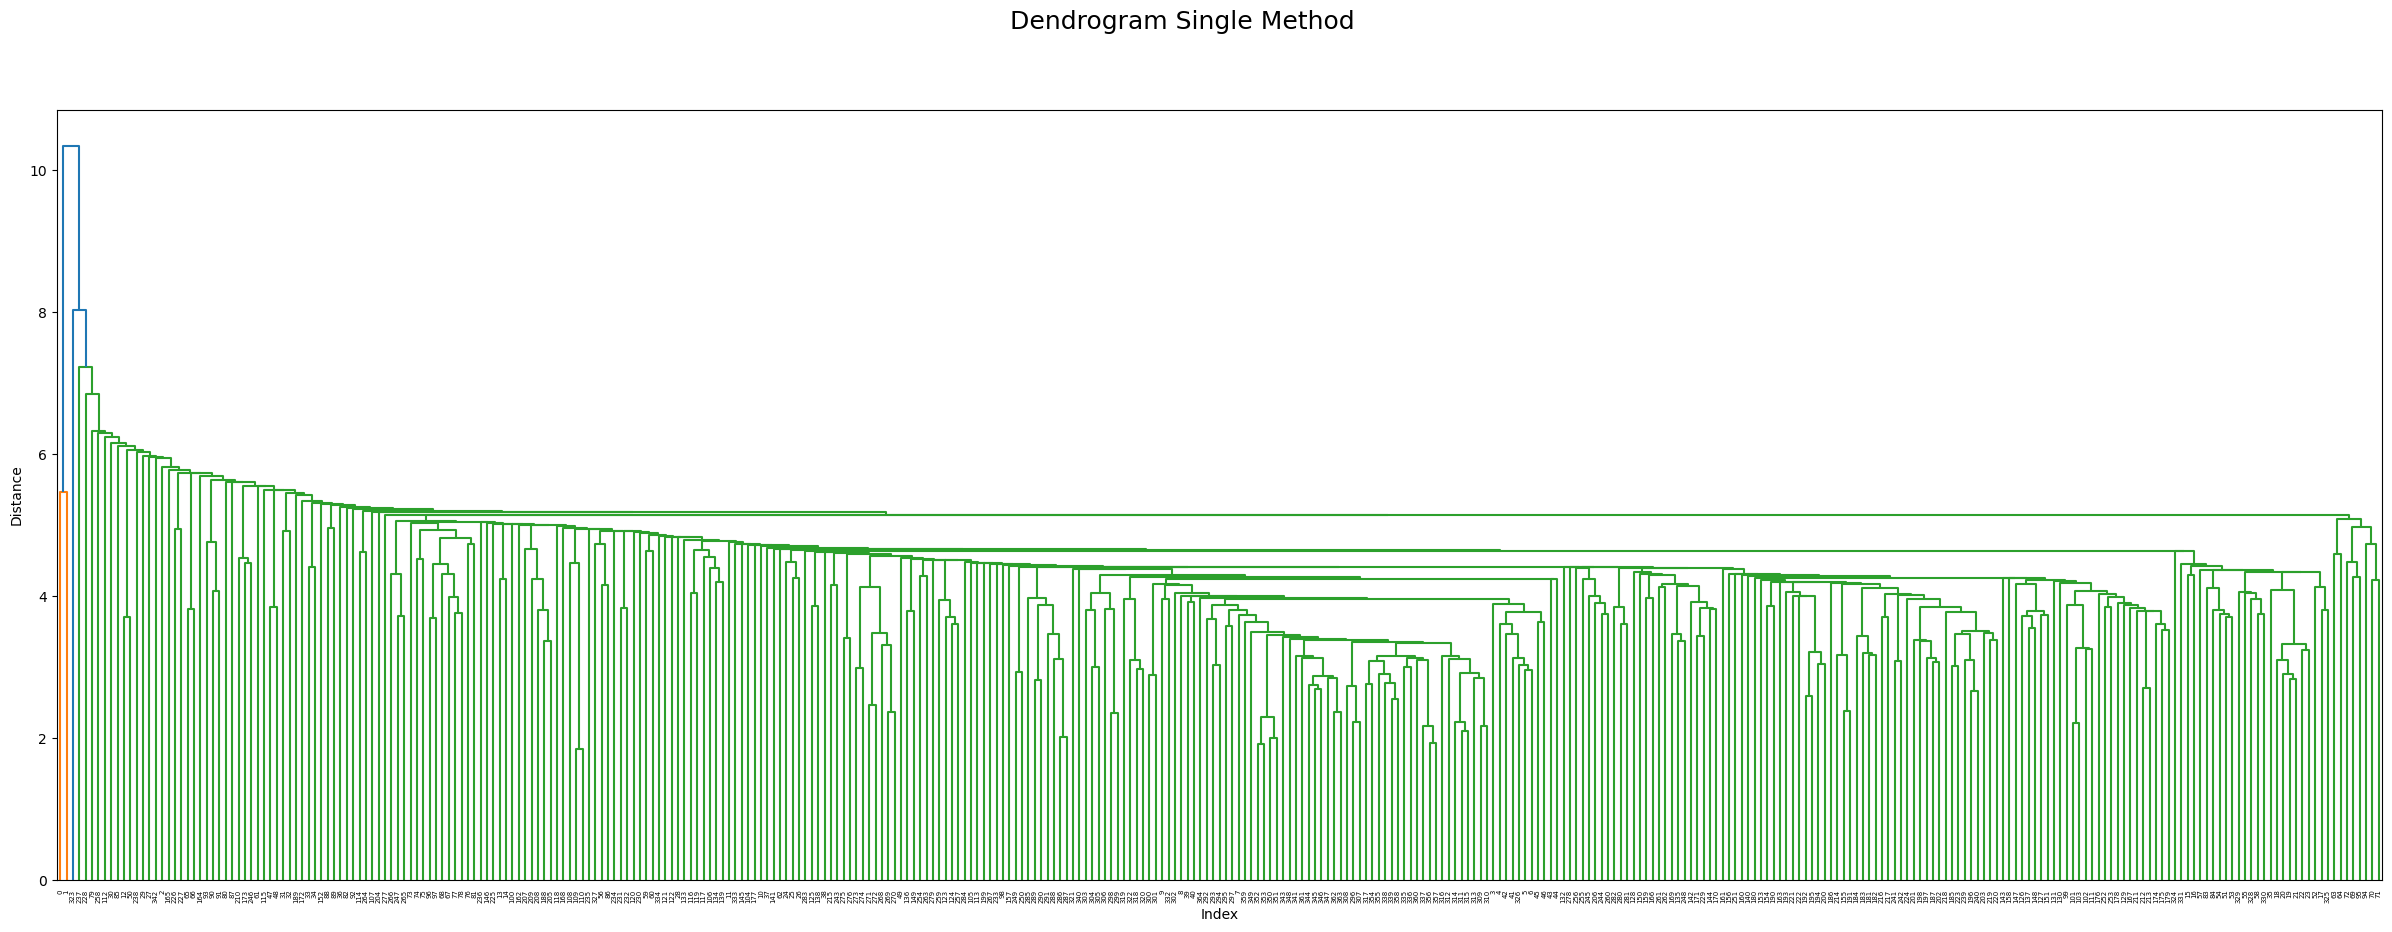

In [13]:
# Single method

distance_single = linkage(df_2015[columns_to_plot], method="single")
plt.figure(figsize=(30,10))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

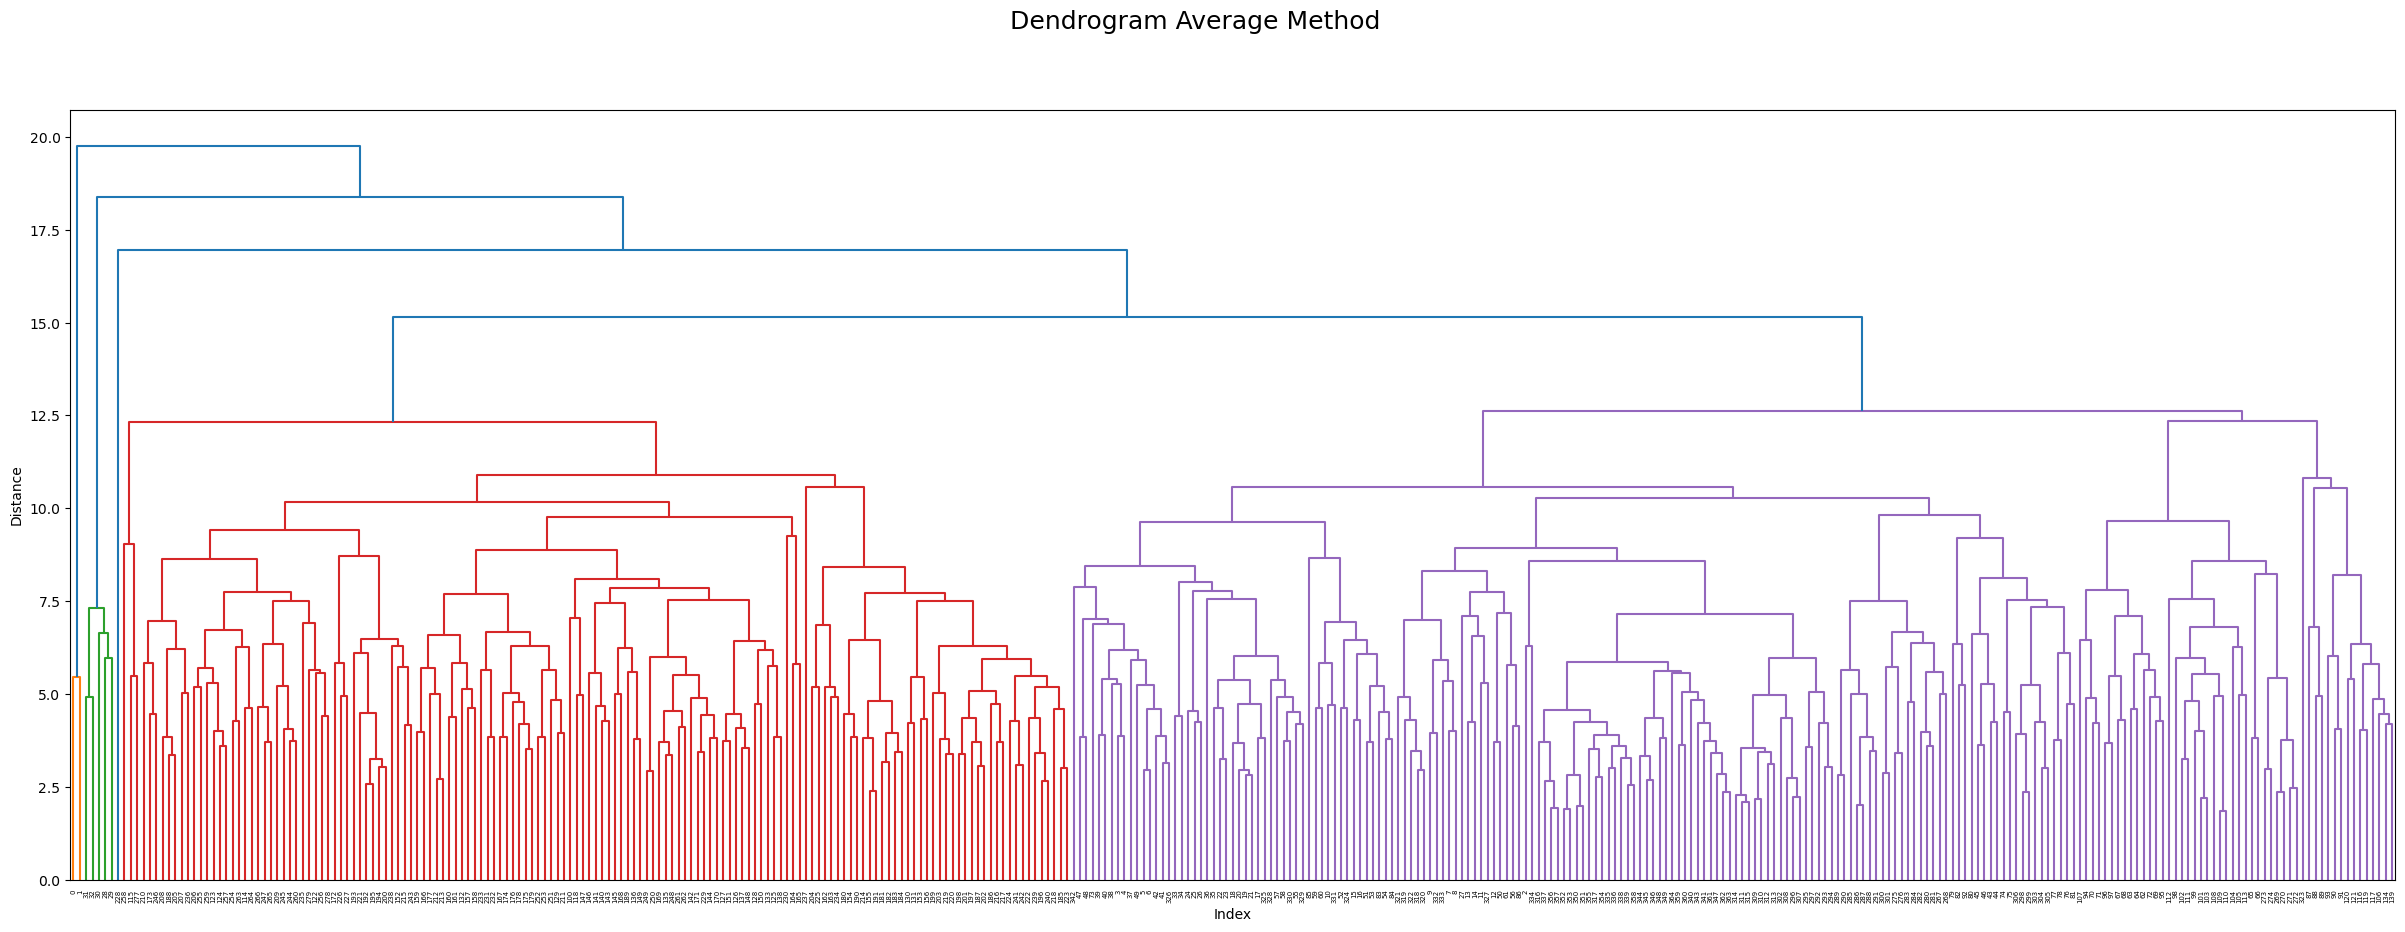

In [14]:
# Average method

distance_single = linkage(df_2015[columns_to_plot], method="average")
plt.figure(figsize=(30,10))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

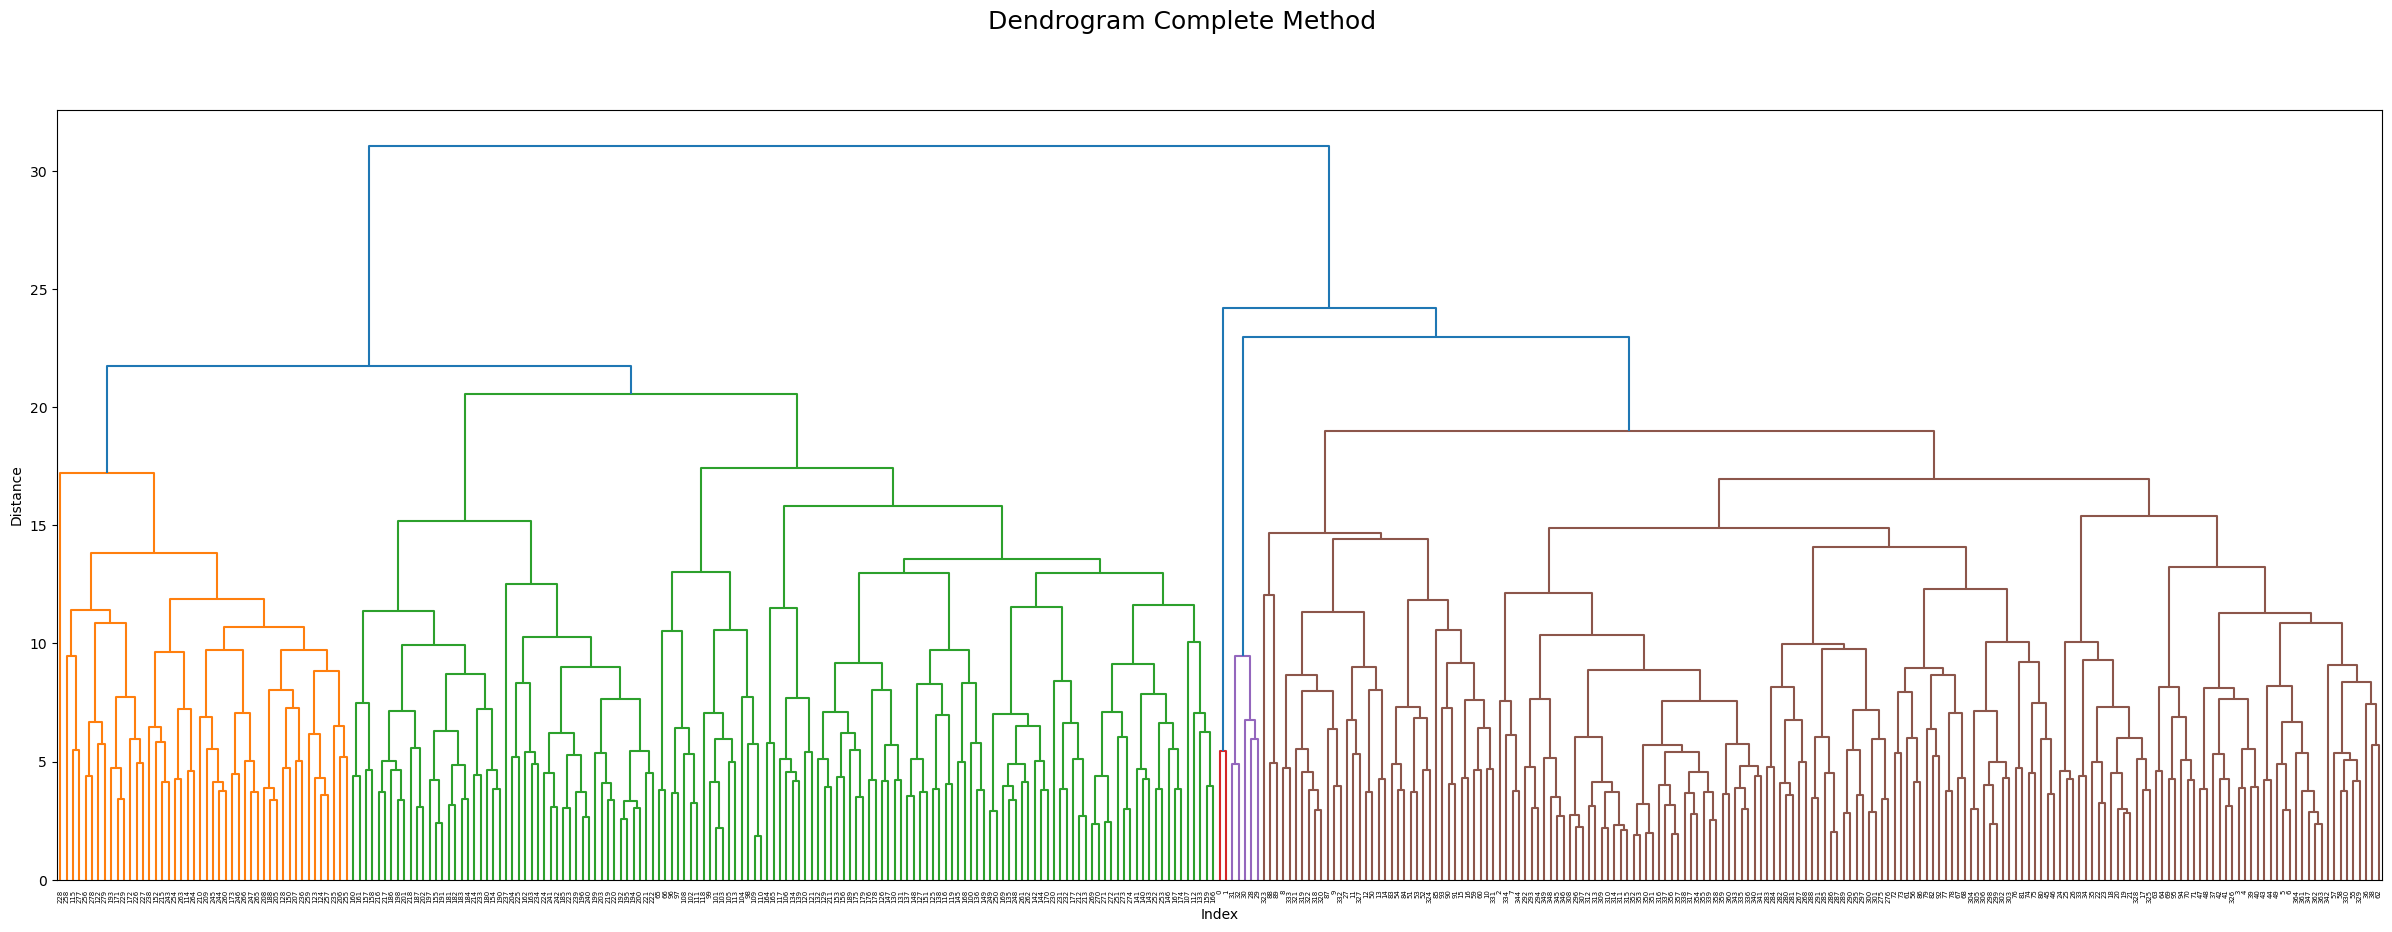

In [15]:
# Complete method

distance_single = linkage(df_2015[columns_to_plot], method="complete")
plt.figure(figsize=(30,10))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

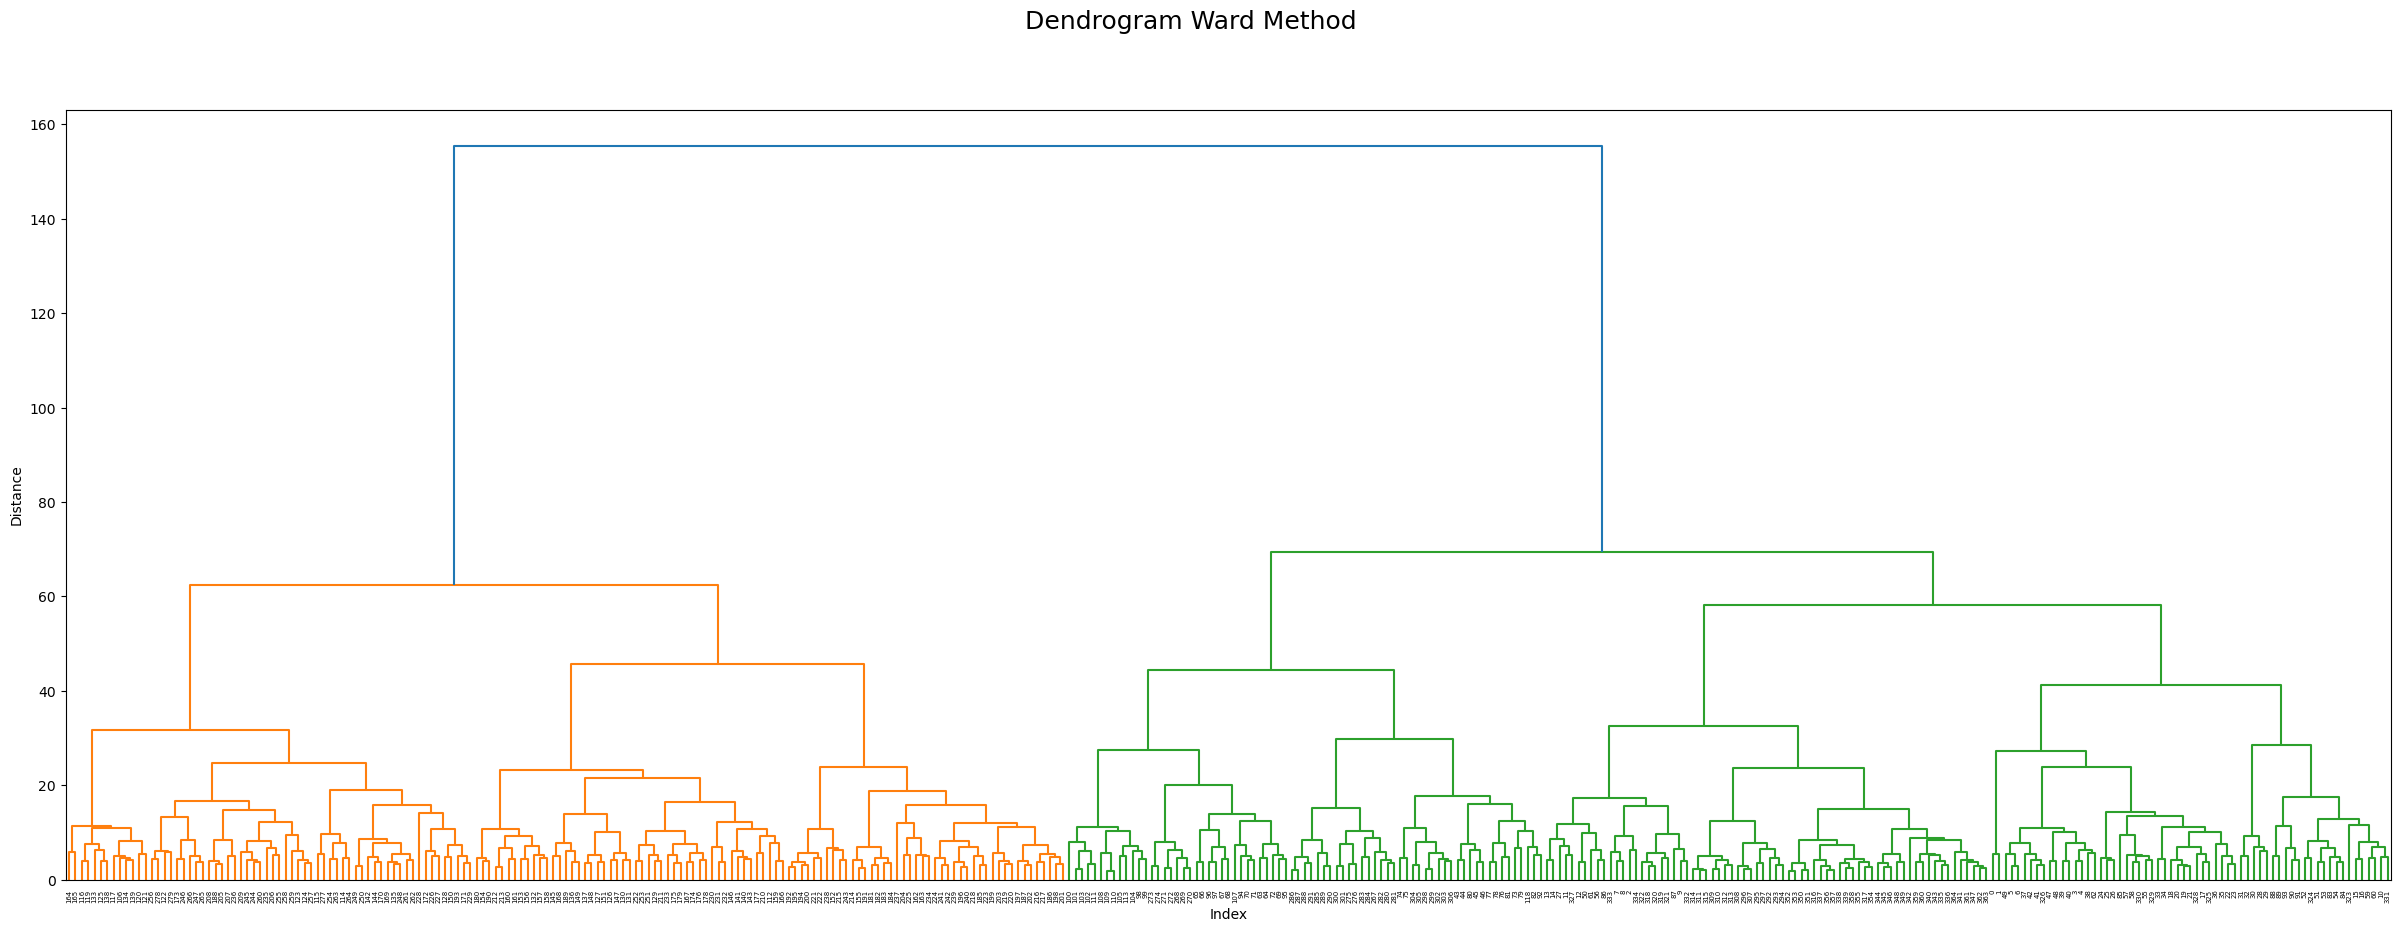

In [16]:
# Ward method

distance_single = linkage(df_2015[columns_to_plot], method="ward")
plt.figure(figsize=(30,10))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()